# CS 412 Machine Learning 2020 

# Assignment 1

100 pts

## Goal 

The goal of this assignment 

*  Introduction to the machine learning experimental set up
*  Gain experience with the Scikit library
*  Gain experience with Decision tree and k-NN models

## Dataset

**Wine Quality Dataset** is a collection red and white wines with 12 attributes. The target variable is the 'quality' either 0 or 1


## Task
Build a decision tree and k-NN classifiers with the scikit-learn library function calls to **classify** the quality of wine as good (1) and bad (0)

## Submission

Follow the instructions at the end.

# 1) Initialize

First, make a copy of this notebook in your drive

In [1]:
# Mount to your drive, in this way you can reach files that are in your drive
# Run this cell

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2) Load Dataset
To start working for your homework, take a copy of the folder, given in the below link to your own google drive. You find the train and test data under this folder.

https://drive.google.com/drive/folders/1PC6M332CTdW-OOrgJ-1GU1F3UaRupka8?usp=sharing

After copy the folder, copy the path of the train and test dataset to paste them in the below cell to load your data.

In [84]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/drive/My Drive/winequality-train.csv')
test_df =pd.read_csv('/content/drive/My Drive/winequality-test.csv') # One line of code

# 3) Understand the dataset

You can use the fuctions that we saw in the recitations to understand the dataset

In [85]:
# print shape of the train and test sets
print(train_df.shape)
print(test_df.shape)


# show random samples from the training data
train_df.sample(10)


(5198, 13)
(1299, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type,quality
3524,8.8,0.23,0.74,3.2,0.042,15.0,126.0,0.99340,3.02,0.51,11.2,0,0
2598,6.3,0.68,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,1,0
4198,8.2,0.34,0.37,1.9,0.057,43.0,74.0,0.99408,3.23,0.81,12.0,1,0
3675,8.9,0.48,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,1,1
299,6.5,0.28,0.28,20.4,0.041,40.0,144.0,1.00020,3.14,0.38,8.7,0,0
4537,5.7,0.33,0.15,1.9,0.050,20.0,93.0,0.99340,3.38,0.62,9.9,0,0
1989,7.1,0.66,0.00,2.4,0.044,6.0,11.0,0.99318,3.35,0.66,12.7,1,1
4846,8.2,0.34,0.29,5.2,0.076,19.0,92.0,0.99138,2.95,0.39,12.5,0,0
4964,8.2,0.40,0.44,2.8,0.089,11.0,43.0,0.99750,3.53,0.61,10.5,1,0
285,6.1,0.32,0.37,1.8,0.051,13.0,200.0,0.99450,3.49,0.44,10.5,0,0


In [86]:
# print information about the datasets (Is there any missing value? or Categorical feature?)
print(train_df.info())
print(test_df.info())
#There is no missing value or cathegorical feature in these data sets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5198 non-null   float64
 1   volatile acidity      5198 non-null   float64
 2   citric acid           5198 non-null   float64
 3   residual sugar        5198 non-null   float64
 4   chlorides             5198 non-null   float64
 5   free sulfur dioxide   5198 non-null   float64
 6   total sulfur dioxide  5198 non-null   float64
 7   density               5198 non-null   float64
 8   pH                    5198 non-null   float64
 9   sulphates             5198 non-null   float64
 10  alcohol               5198 non-null   float64
 11  wine type             5198 non-null   int64  
 12  quality               5198 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 528.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1

# 4) Define train and test labels

In [87]:
# make sure you remove the labels from datasets

train_labels = train_df.pop("quality")
test_labels = test_df.pop("quality")

# 5) FineTune Decision Tree hyper-parameters

1-Splitting dataset into train and validation

In [88]:
# Split training data to 70% training and 30% validation, do not forget to use the random_state parameter
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_df,train_labels,test_size = 0.3, random_state = 1010)

2- FineTune minimum sample split

In [89]:
from sklearn.tree import DecisionTreeClassifier

min_samples_splits = range(2, 50)

train_results = []
val_results = []
for min_samples_split in min_samples_splits:

  # Fit the tree using the 70% portion of the training data
  dtClass = DecisionTreeClassifier(min_samples_split= min_samples_split, random_state= 1010)
  dtClass.fit(x_train,y_train)

  # Evaluate on Training set
  train_acc = dtClass.score(train_df,train_labels)
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_acc = dtClass.score(x_val,y_val)
  val_results.append(val_acc)

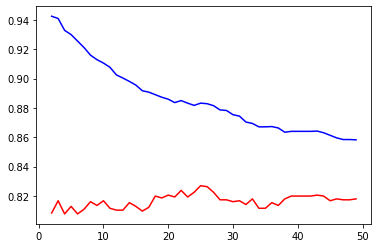

In [90]:
# Plot the results
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [98]:
# Choose the best minimum split sample based on the plot
Best_minSampl = min_samples_splits[np.argmax(val_results)]
print(Best_minSampl, " is our best minimum sample split value")

# Train decision tree using the full training data and the best minimum split sample
dtClass = DecisionTreeClassifier(min_samples_split=Best_minSampl, random_state= 1010)
dtClass.fit(train_df,train_labels)

# Estimate the prediction of the test data
test_pred = dtClass.predict(test_df) # One line of code

from sklearn.metrics import accuracy_score
# Calculate accuracy of test data
TestAcc = accuracy_score(test_labels, test_pred)
print("Testing Accuracy = %.4f%%" % (TestAcc * 100))
print(x_train)
print("-------------------")
print(y_train)

25  is our best minimum sample split value
Testing Accuracy = 81.8322%
      fixed acidity  volatile acidity  ...  alcohol  wine type
2185            7.6              0.31  ...      9.7          0
3193            9.2              0.92  ...      9.8          1
4928            7.0              0.32  ...     12.8          0
2115            7.3              0.34  ...     10.2          0
3797            8.4              0.35  ...      9.4          0
...             ...               ...  ...      ...        ...
354             4.4              0.46  ...     13.1          0
4906            6.0              0.34  ...     10.7          0
2582            6.9              0.48  ...     12.2          0
202             7.2              0.25  ...      9.0          0
1736            7.1              0.65  ...      9.1          1

[3638 rows x 12 columns]
-------------------
2185    0
3193    0
4928    1
2115    0
3797    0
       ..
354     0
4906    0
2582    1
202     1
1736    0
Name: quality, Le

# 6) Apply the same procedure but using k-NN instead of decision tree

For finetuning, find the best value of K to use with this dataset.

In [92]:
from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = np.arange(1,30,2)

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
  # Follow what we did in decision tree part
  model= KNeighborsClassifier(n_neighbors = k)
  model.fit( x_train , y_train )
  predictsKnn = model.predict(x_val)
  accuracies.append(accuracy_score(y_val,predictsKnn))


print("Best Validation Accuracy = %.4f%%" % (np.max(accuracies)*100))

Best Validation Accuracy = 81.2179%


In [97]:
# Train k-NN using the full training data with the best K that you found
model = KNeighborsClassifier(n_neighbors= kVals[np.argmax(accuracies)])
model.fit(train_df,train_labels)
# Testing
predictsKnn= model.predict(test_df)
print(accuracy_score(test_labels, predictsKnn), " : is our accuracy score on test database")

0.8083140877598153  : is our accuracy score on test database


In [99]:
%%shell
jupyter nbconvert --to html /content/ML_tugcanbarbin_HW1.ipynb

[NbConvertApp] Converting notebook /content/ML_tugcanbarbin_HW1.ipynb to html
[NbConvertApp] Writing 321085 bytes to /content/ML_tugcanbarbin_HW1.html


# 7) Notebook & Report

Notebook: We may just look at your notebook results; so make sure each cell is run and outputs are there.

Report: Write an at most 1/2 page summary of your approach to this problem at the end of your notebook; this should be like an abstract of a paper or the executive summary.

Must include statements such as:

( Include the problem definition: 1-2 lines )

(Talk about any preprocessing you did, explain your reasoning)

(Talk about train/val/test sets, size and how split)

(State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier (parameters=....) , giving classification accuracy of …% on test data….")

(Comment on the speed of the algorithms and anything else that you deem important/interesting)


You will get full points from here as long as you have a good (enough) summary of your work, regardless of your best performance or what you have decided to talk about in the last few lines.



# Report

In this homework, we are given two datasets that has same features and label but splitted in terms of test and train. We are trying to predict the quality of a wine by using features of that wine. To achieve this prediction goal, we need to use machine learning.


Firstly, i checked the both data's informations to see whether there are some missing informations or columns but i could not find any missing information. Then, i splitted labels from original datas, so i had four data:

---->test features

---->test labels

---->train features

---->train labels

Then, i splitted the training  datas into two parts as :

-Training data 70% of actual training data which is used to train my kNN and decision tree

-validation data 30% of actual training data which is used to set the hyperparameters as best

We have achieved to get best result with the Decision Tree Classifier with the parameter of min_sample_split = 25. Our best accuracy is 81.8322% on test data. It is not good enough but not bad either can be improved by tuning other hyperparameters.


I used training (fit) and prediction algorithms in same code boxes. So, i could not compare just training or prediction algorithm speeds. Also, since our data is not big, i could not understand the difference of kNN and Decision Tree performance in terms of speed. However, i feel that kNN is slower than decision 